### Estimating DFE expected purely from sequencing/assay measurement noise.

In [2]:
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

#### Assume that there is no selection. 

This will set the bound for noise expected between technical replicates

In [22]:
def dfe_simulator(coverage, genes, cutoff, var):
    """
    This function simulates an assay for mutations whose fitness are normally distributed with some variance
    The goal is to visualize how parameters influence how much spread in the DFE is expected purely due to chance

    """
    insertions_gene = np.random.exponential(coverage, genes)
    rep1_t0 = np.random.poisson(insertions_gene, genes)
    rep2_t0 = np.random.poisson(insertions_gene, genes)
    #now for combining fitness effect and random sampling:
    rep1_t1 = np.zeros(genes)
    rep2_t1 = np.zeros(genes)

    #tweak this parameter to change the spread of the true DFE.
    s = np.random.normal(0, var, genes)
    rep1_t1 = np.random.poisson(rep1_t0*(1+s)**6.64)
    rep2_t1 = np.random.poisson(rep2_t0*(1+s)**6.64)

    #only consider genes that have at least cutoff reads in every measurement
    mask = (rep1_t1>cutoff)&(rep1_t0>cutoff)&(rep2_t1>cutoff)&(rep2_t0>cutoff)
    rep1_t1 = rep1_t1[mask]
    rep2_t1 = rep2_t1[mask]
    rep2_t0 = rep2_t0[mask]
    rep1_t0 = rep1_t0[mask]
    
    #calculating fitnesses
    s_1 = np.log(rep1_t1/rep1_t0/np.sum(rep1_t1)*np.sum(rep1_t0))/6.64
    s_2 = np.log(rep2_t1/rep2_t0/np.sum(rep2_t1)*np.sum(rep2_t0))/6.64

    return s_1, s_2

In [18]:
coverage = 100
genes = 4300
cutoff = 25

(-0.01413339895327054, 0.4285361181941486)

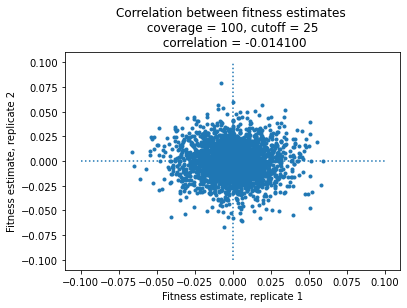

In [24]:
rep1, rep2 = dfe_simulator(coverage, genes, cutoff, var=0)
plt.plot(s_1, s_2, '.')
plt.xlabel('Fitness estimate, replicate 1')
plt.ylabel('Fitness estimate, replicate 2')
plt.title('Correlation between fitness estimates \n coverage = %i, cutoff = %i \n correlation = %f' % (coverage, cutoff, np.round(pearsonr(s_1, s_2)[0],decimals=4)))
plt.hlines(0, -0.1, 0.1, linestyles='dotted')
plt.vlines(0, -0.1, 0.1, linestyles='dotted')
pearsonr(s_1, s_2)

### Plotting the distribution of fitness effects if all genes are precisely neutral

(array([ 0.21454237,  0.        ,  0.10727118,  0.21454237,  0.10727118,
         0.10727118,  0.10727118,  0.53635592,  0.10727118,  0.32181355,
         1.60906775,  1.07271183,  1.07271183,  1.50179657,  2.14542367,
         1.9308813 ,  3.32540668,  5.04174562,  6.75808455,  7.0798981 ,
        11.5852878 , 13.5161691 , 16.30521987, 20.16698247, 21.34696549,
        27.46142294, 30.46501607, 23.59966034, 28.64140596, 23.38511797,
        22.20513495, 16.94884697, 12.33618609, 10.08349124,  7.18716928,
         5.89991508,  4.07630497,  2.78905077,  1.39452538,  1.82361012,
         1.60906775,  0.75089828,  0.85816947,  0.10727118,  0.10727118,
         0.10727118,  0.21454237,  0.10727118,  0.        ,  0.21454237]),
 array([-0.07940566, -0.0764528 , -0.07349994, -0.07054709, -0.06759423,
        -0.06464137, -0.06168852, -0.05873566, -0.0557828 , -0.05282995,
        -0.04987709, -0.04692423, -0.04397138, -0.04101852, -0.03806566,
        -0.03511281, -0.03215995, -0.02920709, -0

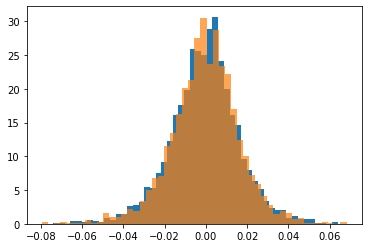

In [25]:
plt.hist(rep1, bins=50, density=1)
plt.hist(rep2, bins=50, alpha=0.7, density=1)

Even if all the mutations were completely neutral, we expect to see a fair amount of variation in the fitness estimates.

(0.008991120073893053, 0.5942205708953109)

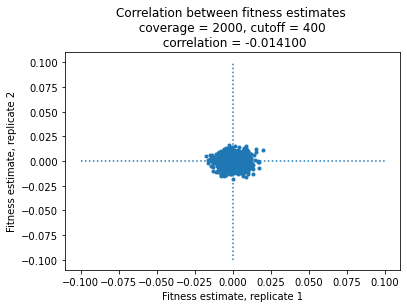

In [28]:
coverage = 2000
genes = 4300
cutoff = 400
rep1, rep2 = dfe_simulator(coverage, genes, cutoff, var=0)
plt.plot(rep1, rep2, '.')
plt.xlabel('Fitness estimate, replicate 1')
plt.ylabel('Fitness estimate, replicate 2')
plt.title('Correlation between fitness estimates \n coverage = %i, cutoff = %i \n correlation = %f' % (coverage, cutoff, np.round(pearsonr(s_1, s_2)[0],decimals=4)))
plt.hlines(0, -0.1, 0.1, linestyles='dotted')
plt.vlines(0, -0.1, 0.1, linestyles='dotted')
pearsonr(rep1, rep2)

(array([  0.4194111 ,   0.        ,   0.4194111 ,   0.4194111 ,
          0.83882221,   1.25823331,   1.67764442,   2.93587773,
          2.09705552,   3.35528884,   2.09705552,   4.19411105,
          7.12998878,   6.71057768,  10.90468872,  17.19585529,
         18.0346775 ,  20.97055524,  35.6499439 ,  38.16641053,
         52.00697699,  59.97578798,  87.65692089,  90.17338752,
        110.72453165, 122.46804258, 121.20980927, 119.11275375,
        103.59454287,  92.68985415,  79.2686988 ,  57.03991024,
         49.07109925,  35.2305328 ,  24.74525518,  22.22878855,
         20.55114413,   9.64645541,  10.06586651,  11.74351093,
          4.61352215,   4.61352215,   2.09705552,   4.19411105,
          0.4194111 ,   0.4194111 ,   1.25823331,   0.83882221,
          0.83882221,   0.4194111 ]),
 array([-0.0178746 , -0.01719589, -0.01651719, -0.01583848, -0.01515977,
        -0.01448107, -0.01380236, -0.01312365, -0.01244495, -0.01176624,
        -0.01108753, -0.01040883, -0.00973012, -

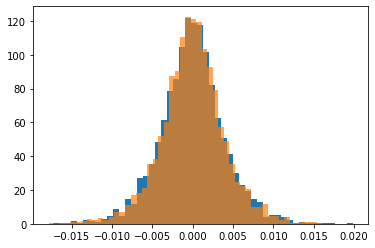

In [29]:
plt.hist(rep1, bins=50, density=1)
plt.hist(rep2, bins=50, alpha=0.7, density=1)